# This is a simple example of how to load and plot the provided data.

In [6]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Load the data (update the path to the correct location)
data_path = "../processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    CH4        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    CO2        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    SO2        (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    pr         (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
    rsdt       (ssp, time, y, x) float32 56MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    tas        (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

## Plot a few snapshots of temperature and precipitation (first, middle, and last)

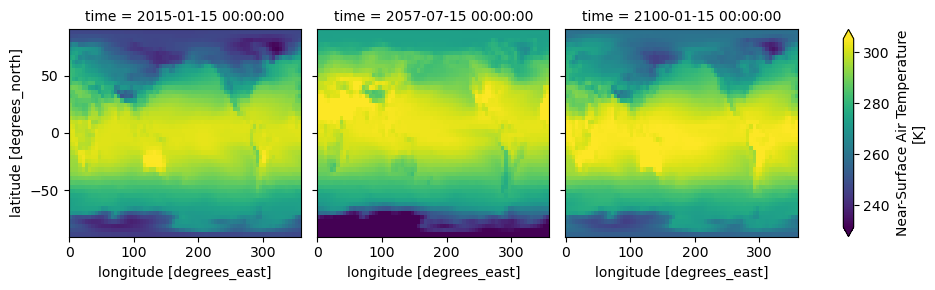

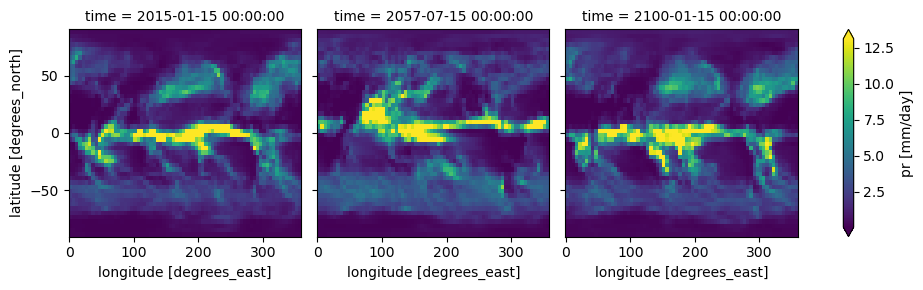

In [3]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

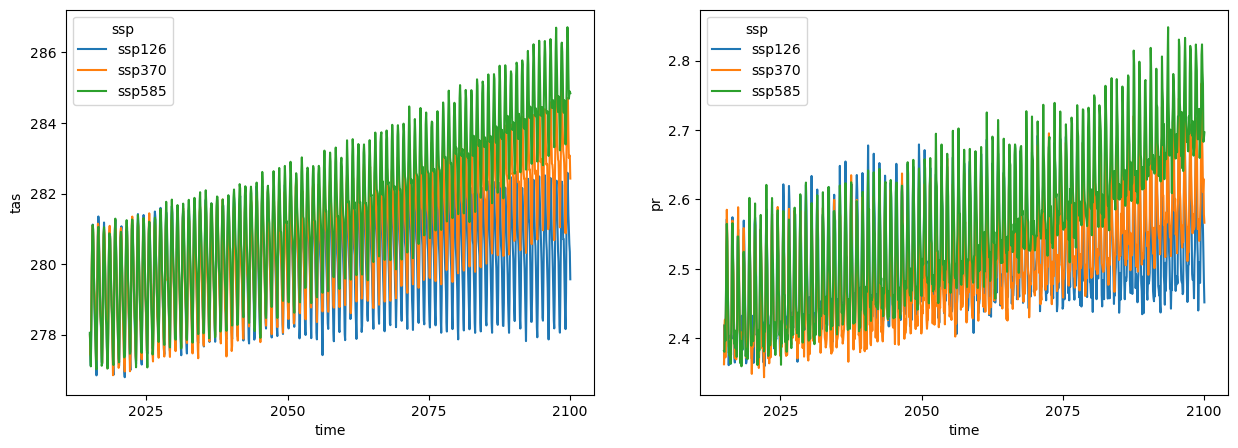

In [4]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

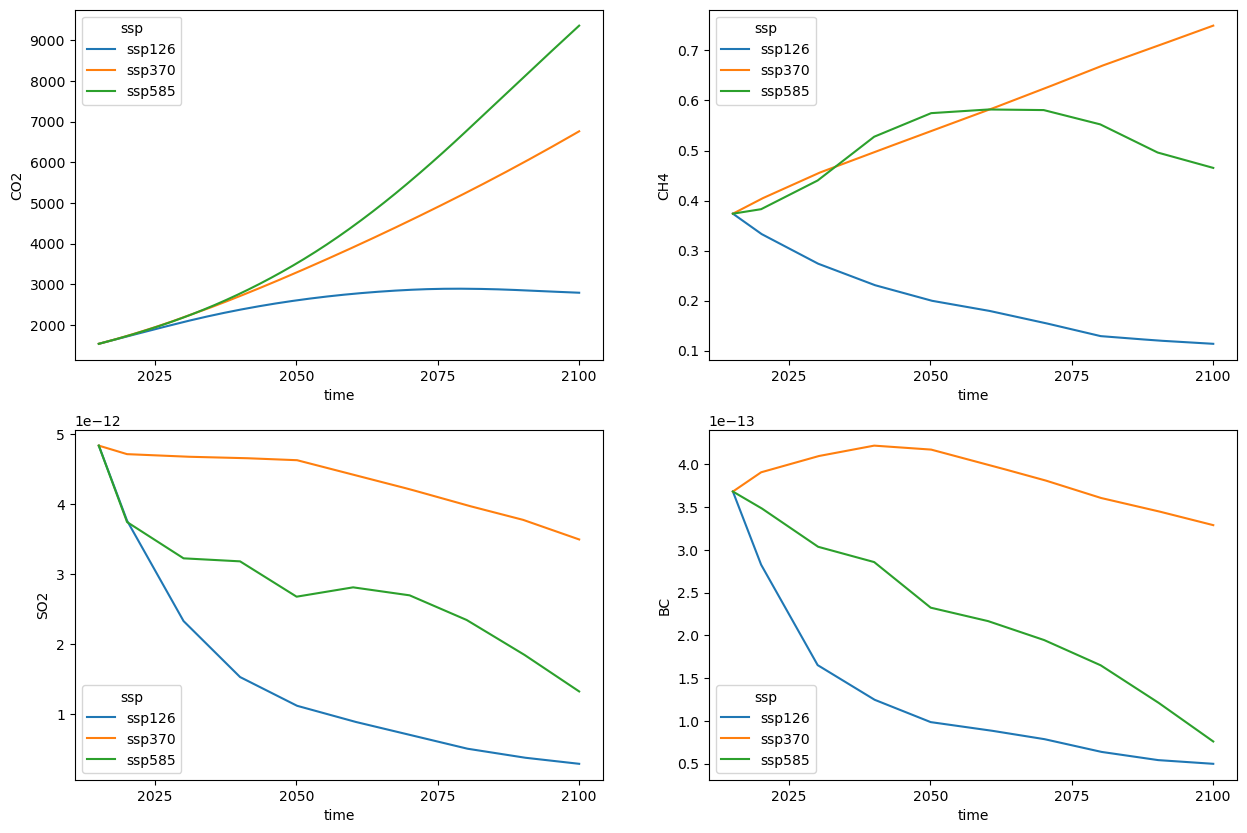

In [5]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")

In [8]:
print("Dataset dimensions:", data.dims)
print("Variables:", list(data.data_vars))

# 1021 months - 48x72 grid 

Dataset dimensions: FrozenMappingWarningOnValuesAccess({'ssp': 4, 'time': 1021, 'latitude': 48, 'longitude': 72, 'x': 72, 'y': 48, 'member_id': 3})
Variables: ['BC', 'CH4', 'CO2', 'SO2', 'pr', 'rsdt', 'tas']


In [9]:
tas = data["tas"]
pr = data["pr"]

print("Temperature mean (K):", float(tas.mean().values))
print("Temperature std (K):", float(tas.std().values))

print("Precipitation mean (mm/day):", float(pr.mean().values))
print("Precipitation std (mm/day):", float(pr.std().values))

Temperature mean (K): 210.59423828125
Temperature std (K): 122.9310302734375
Precipitation mean (mm/day): 1.894483208656311
Precipitation std (mm/day): 2.8006982803344727


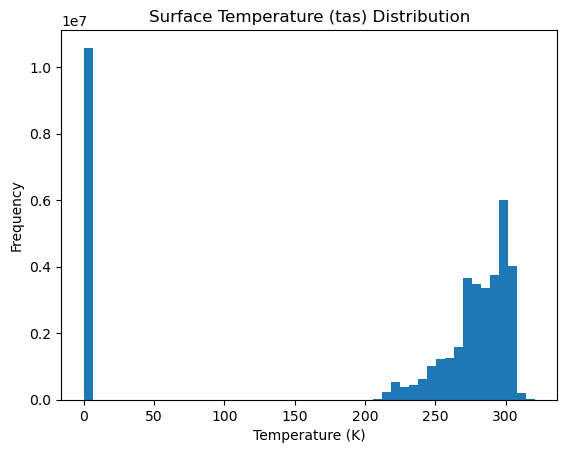

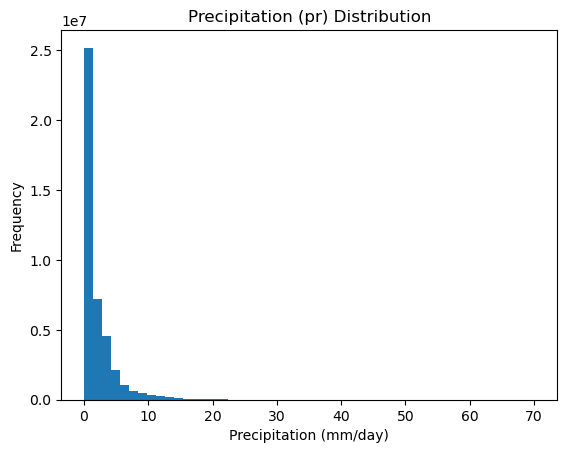

In [11]:
import numpy as np

tas_flat = tas.values.flatten()
pr_flat = pr.values.flatten()

plt.hist(tas_flat[~np.isnan(tas_flat)], bins=50)
plt.title("Surface Temperature (tas) Distribution")
plt.xlabel("Temperature (K)")
plt.ylabel("Frequency")
plt.show()

plt.hist(pr_flat[~np.isnan(pr_flat)], bins=50)
plt.title("Precipitation (pr) Distribution")
plt.xlabel("Precipitation (mm/day)")
plt.ylabel("Frequency")
plt.show()

CO2: mean = 3563.00, std = 1683.45
SO2: mean = 0.00, std = 0.00
CH4: mean = 0.40, std = 0.17
BC: mean = 0.00, std = 0.00
rsdt: mean = 297.65, std = 164.09


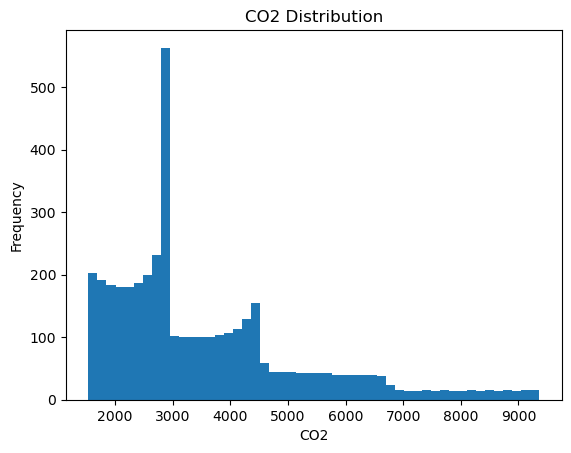

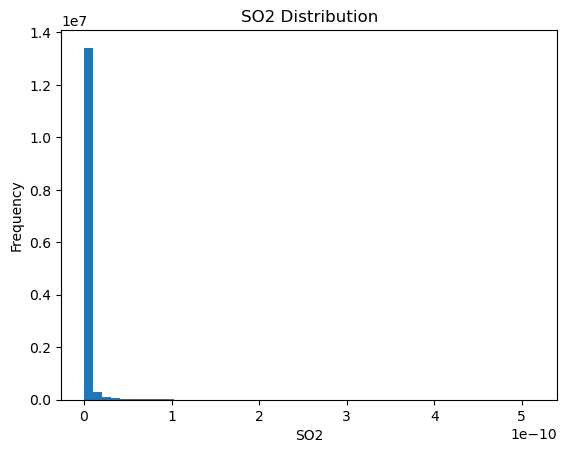

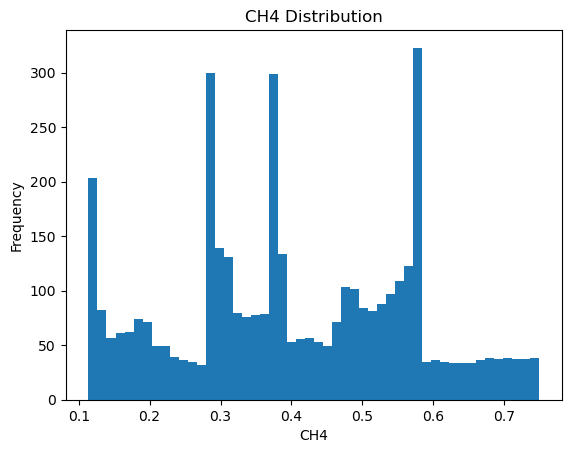

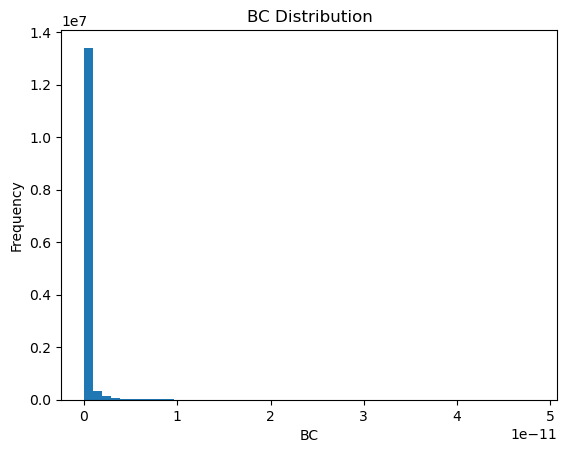

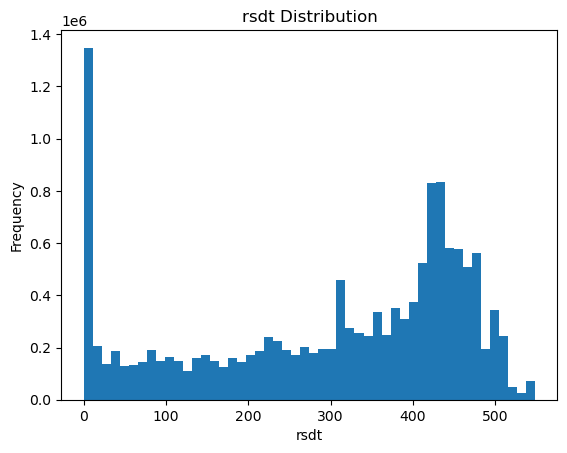

In [13]:
for var in ["CO2", "SO2", "CH4", "BC", "rsdt"]:
    print(f"{var}: mean = {float(data[var].mean().values):.2f}, std = {float(data[var].std().values):.2f}")

for var in ["CO2", "SO2", "CH4", "BC", "rsdt"]:
    arr = data[var].values.flatten()
    plt.hist(arr[~np.isnan(arr)], bins=50)
    plt.title(f"{var} Distribution")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

In [18]:
# BC
# (ssp, time, latitude, longitude)

# CH4
# (ssp, time)

# CO2
# (ssp, time)

# SO2
# (ssp, time, latitude, longitude)

# pr
# (ssp, time, member_id, y, x)
# (4, 1021, 3, 48, 72)

# rsdt
# (ssp, time, y, x)

# tas
# (ssp, time, member_id, y, x)

# for each scenario (SSP), the model was run 3 times — producing 3 ensemble members. These are indexed by member_id = 0, 1, 2.
# -Each member_id starts with slightly different initial conditions (like small temperature differences)
# -Gives a plausible realization of the future under the same external forcings

# ssp126, ssp245, ssp370, ssp585
# SSPs describe different possible futures of society and greenhouse gas emissions. 
# Each SSP is an emission scenario used in climate projections.

# Scenario	Name	Description	Forcing
# SSP126	Sustainability	Low emissions (green energy, sustainable dev)	🔵 Low
# SSP245	Middle of the road	Intermediate emissions	🟠 Medium
# SSP370	Regional rivalry	High emissions, regional focus	🔴 High
# SSP585	Fossil-fueled development	Very high emissions (fossil-heavy economy)	🔴🔴 Very High

data["pr"]["y"]

<xarray.DataArray 'y' (y: 48)> Size: 384B
array([-88.586387, -84.816754, -81.04712 , -77.277487, -73.507853, -69.73822 ,
       -65.968586, -62.198953, -58.429319, -54.659686, -50.890052, -47.120419,
       -43.350785, -39.581152, -35.811518, -32.041885, -28.272251, -24.502618,
       -20.732984, -16.963351, -13.193717,  -9.424084,  -5.65445 ,  -1.884817,
         1.884817,   5.65445 ,   9.424084,  13.193717,  16.963351,  20.732984,
        24.502618,  28.272251,  32.041885,  35.811518,  39.581152,  43.350785,
        47.120419,  50.890052,  54.659686,  58.429319,  62.198953,  65.968586,
        69.73822 ,  73.507853,  77.277487,  81.04712 ,  84.816754,  88.586387])
Coordinates:
  * y        (y) float64 384B -88.59 -84.82 -81.05 -77.28 ... 81.05 84.82 88.59
Attributes:
    axis:           Y
    bounds:         lat_bnds
    standard_name:  latitude
    title:          Latitude
    type:           double
    units:          degrees_north
    valid_max:      90.0
    valid_min:      -90.0